         0%      10%     20%V       20%      10%H       0%V      10%V  \
0  0.717743  0.71257  0.70038  0.708447  0.713016  0.723463  0.713223   

        0%H      20%H  
0  0.717518  0.711318  
['0%H', '10%H', '20%H']
-Users-adrian-Documents-UV-vis-Carlos_P3HT_11-1-24-P3HT AB-Sample 1
        0%       10%      20%V     20%      10%H       0%V      10%V  \
0  0.72492  0.724857  0.717002  0.7203  0.724664  0.742156  0.732778   

        0%H      20%H  
0  0.727476  0.723366  
['0%H', '10%H', '20%H']
-Users-adrian-Documents-UV-vis-Carlos_P3HT_11-1-24-P3HT AB-Sample 2
         0%       10%     10%H       0%V      10%V       0%H
0  0.707459  0.706712  0.70222  0.709784  0.711274  0.705829
['0%H', '10%H']
-Users-adrian-Documents-UV-vis-Carlos_P3HT_11-1-24-P3HTMWCNT AB-Sample 1
         0%    10%  H      0% V     0% H      10%     10%  V
0  0.744639  0.751844  0.744524  0.74158  0.752136  0.753522
['0% H', '10%  H']
-Users-adrian-Documents-UV-vis-Carlos_P3HT_11-1-24-P3HTPCBM MWCNT AB-Sample 

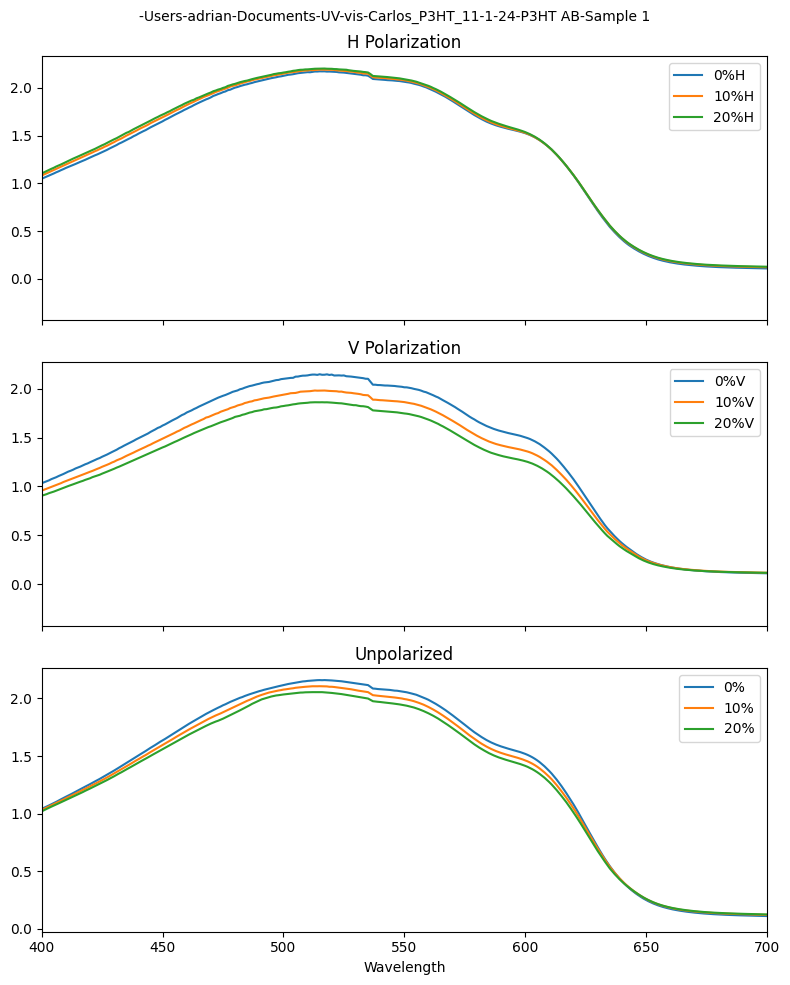

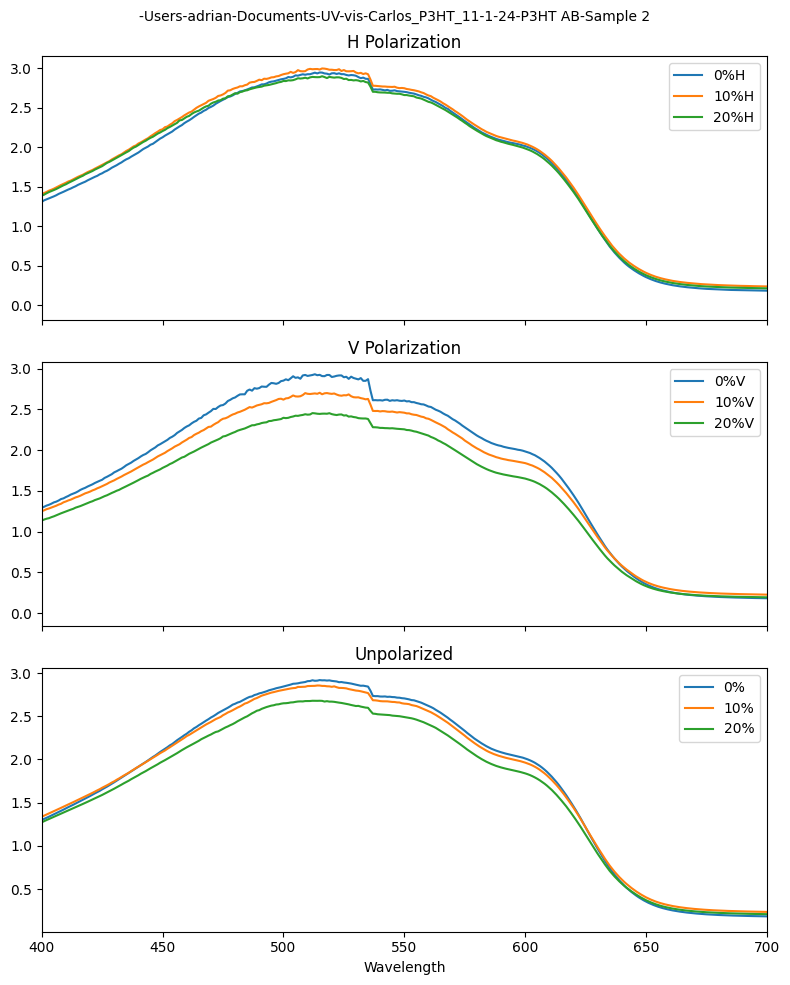

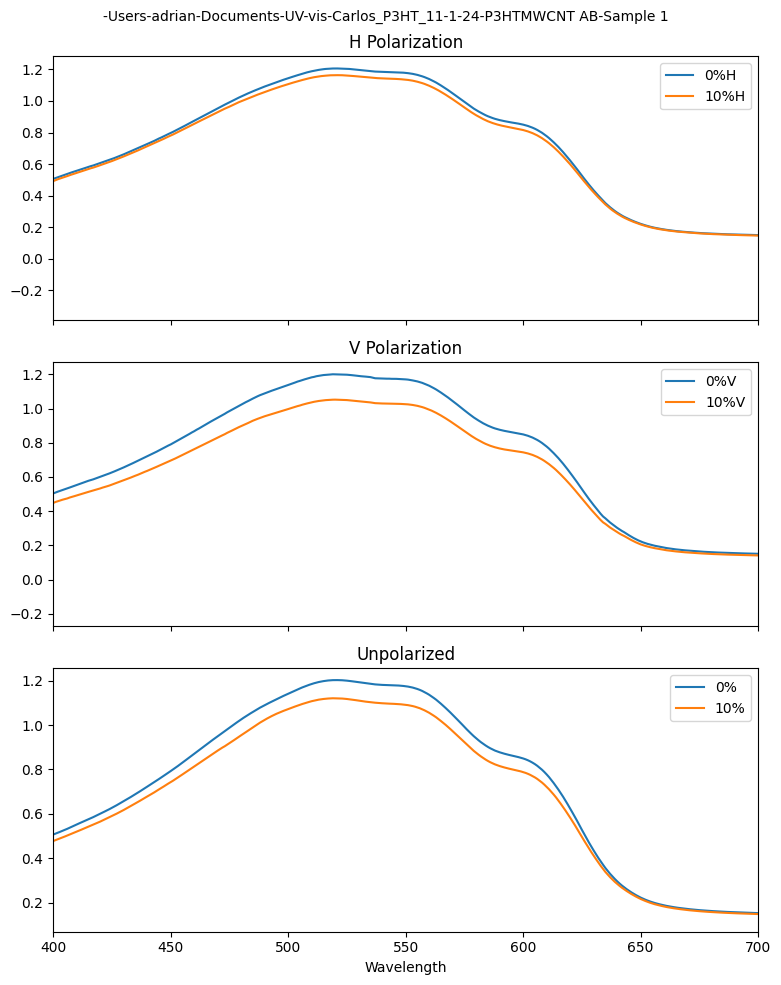

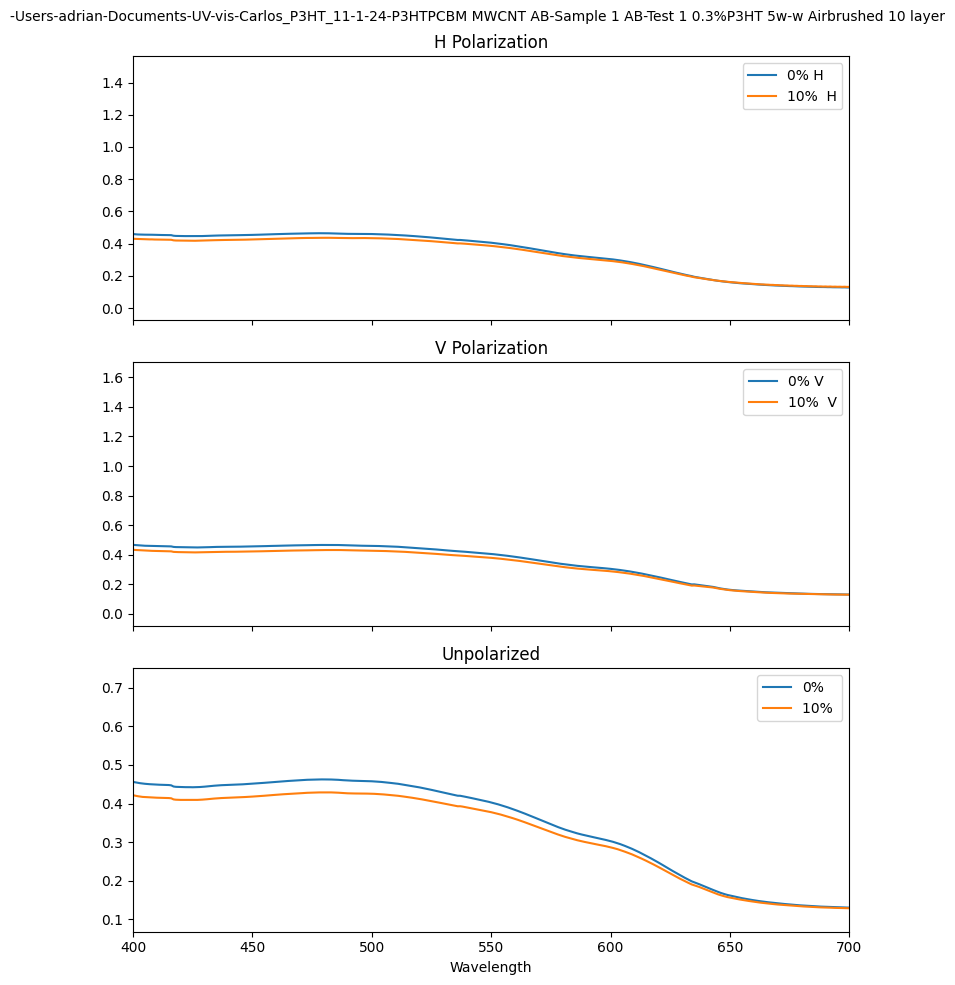

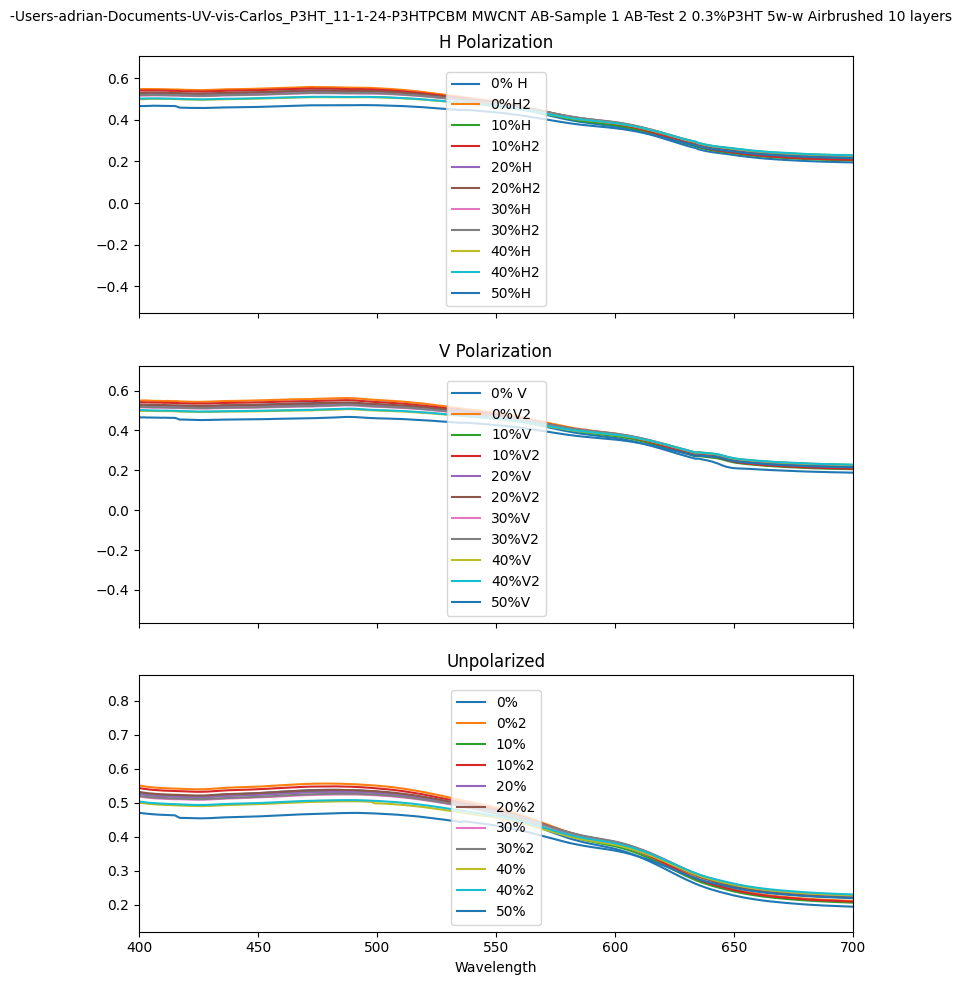

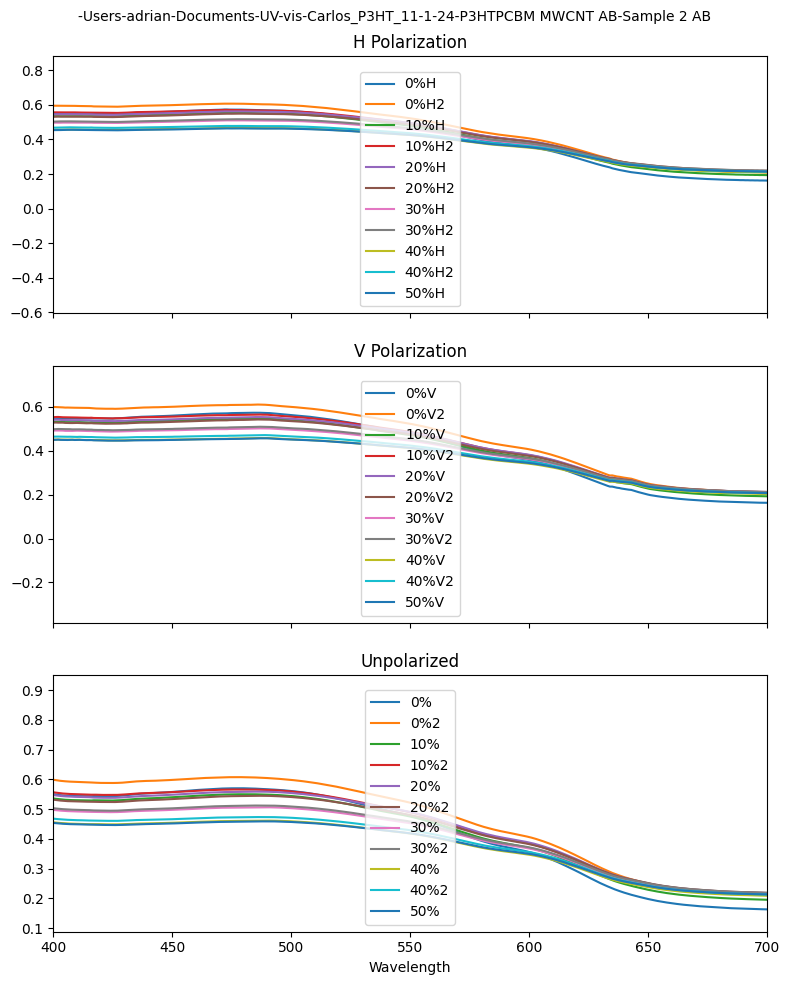

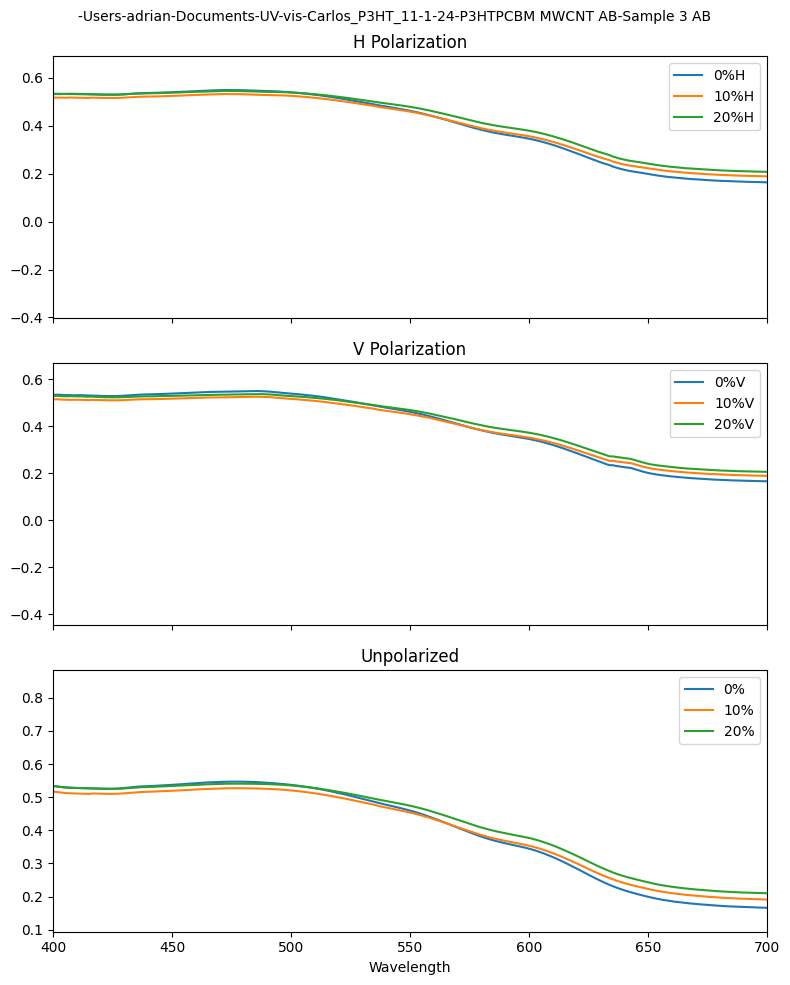

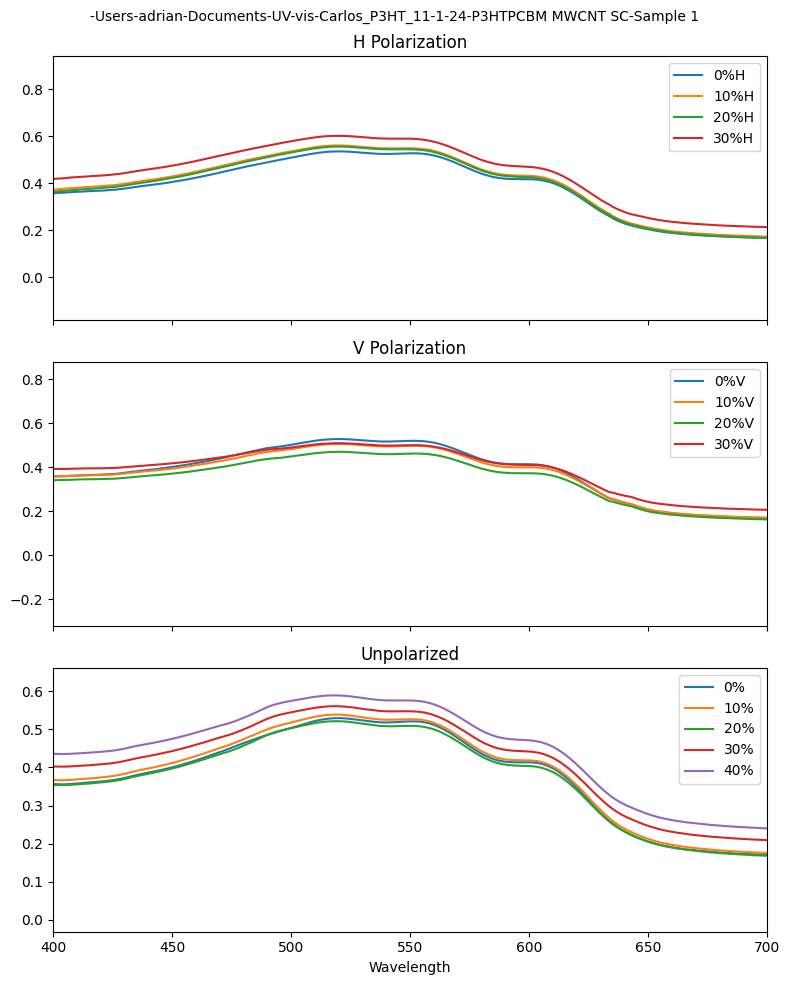

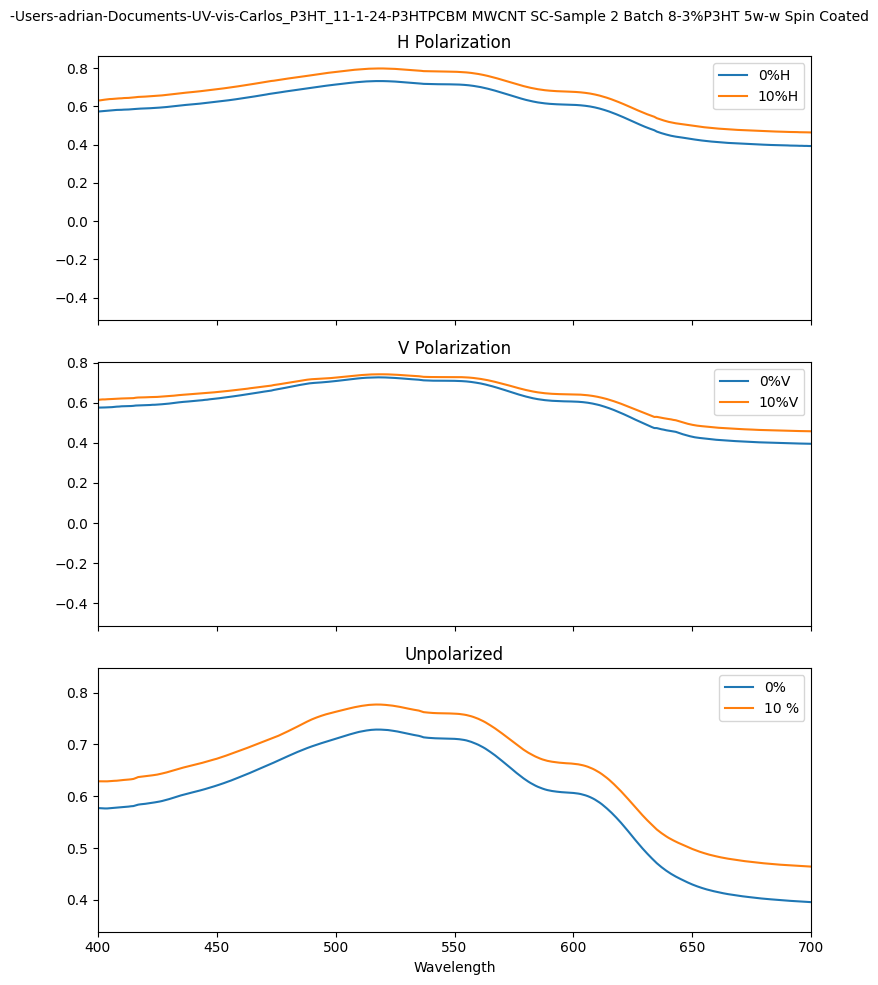

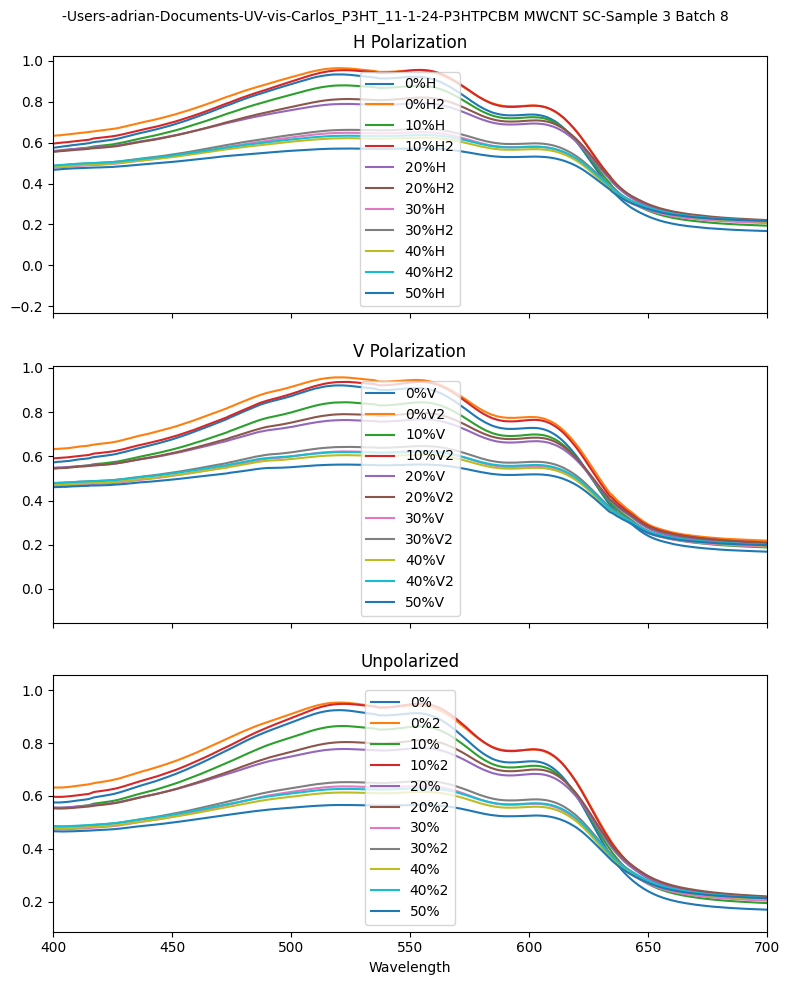

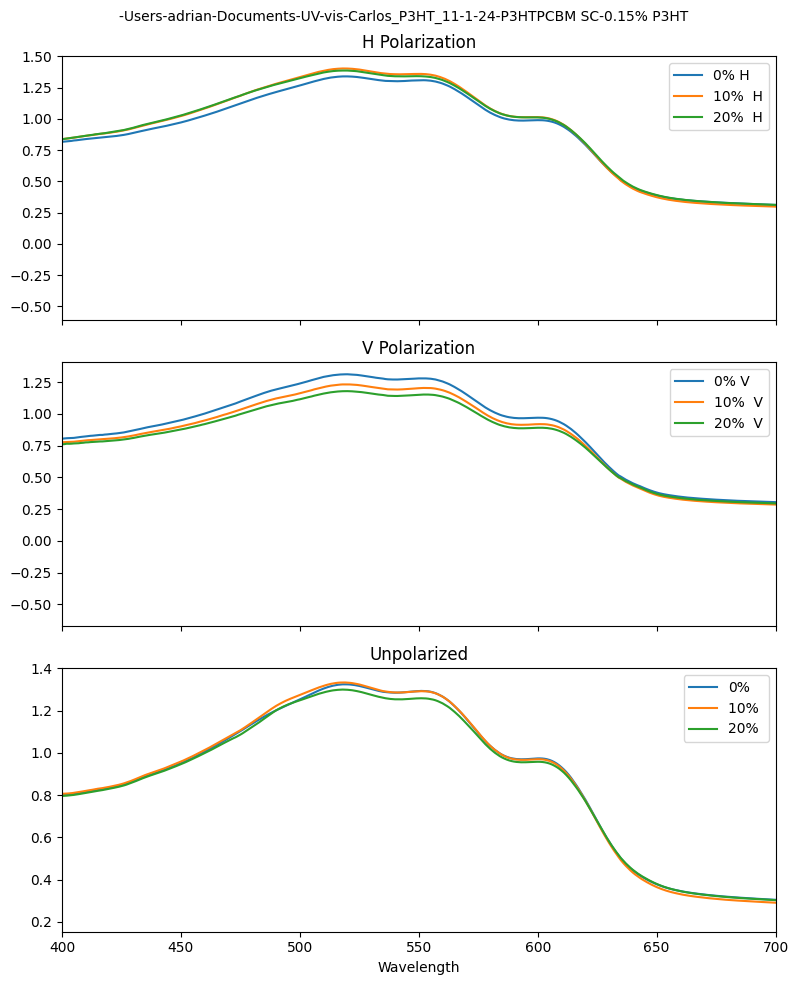

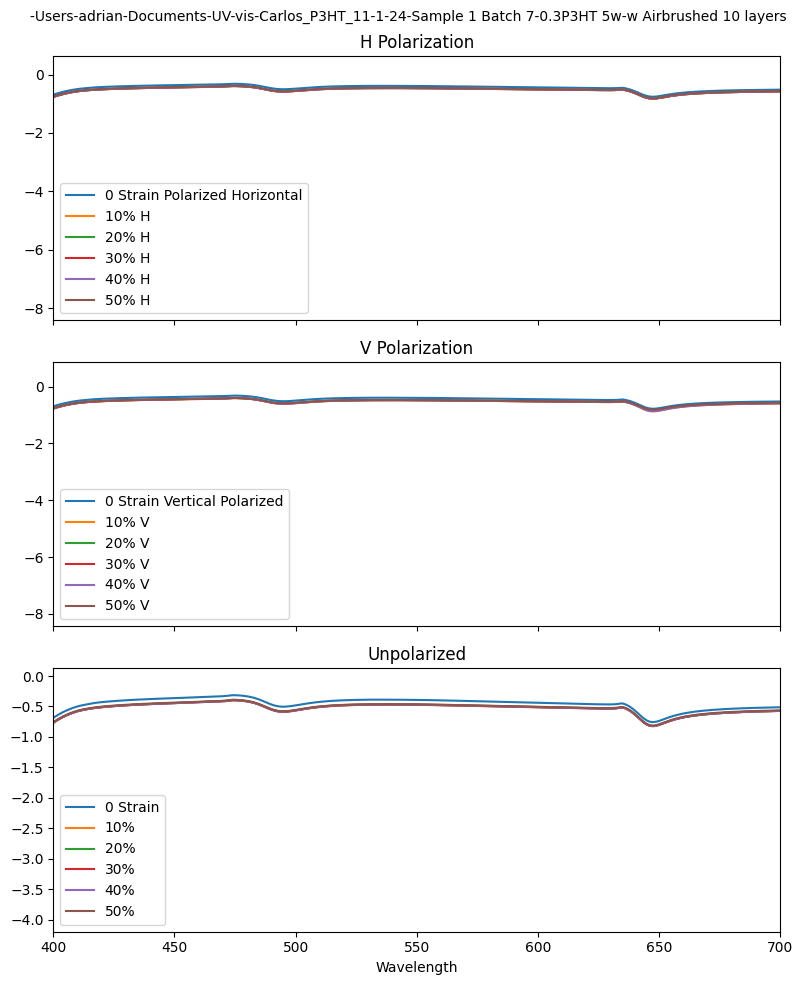

In [162]:
import os
directories = [
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HT AB/Sample 1',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HT AB/Sample 2',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTMWCNT AB/Sample 1',
                # '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTMWCNT AB/Sample 2', #compression?
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT AB/Sample 1 AB/Test 1 0.3%P3HT 5w-w Airbrushed 10 layer',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT AB/Sample 1 AB/Test 2 0.3%P3HT 5w-w Airbrushed 10 layers',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT AB/Sample 2 AB',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT AB/Sample 3 AB',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT SC/Sample 1',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT SC/Sample 2 Batch 8/3%P3HT 5w-w Spin Coated',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT SC/Sample 3 Batch 8',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT',
                '/Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/Sample 1 Batch 7/0.3P3HT 5w-w Airbrushed 10 layers']


file_paths = []

for directory in directories:
    df = pd.DataFrame()
    for root, dirs, files in os.walk(directory):
        # print(f"{root}\n\tSubdirectories: {dirs}\n\tFiles: {files}\n")
        for filename in files:
            absolute_path = os.path.join(root, filename)
            if filename.lower().endswith('.txt'):
                file_paths.append(os.path.abspath(absolute_path))
                # print(f"\tProcessing file: {filename.upper()}")
                df_t = pd.read_csv(absolute_path, skiprows=1, na_values=[' '])
                df_t.columns = ['Wavelength', 'Absorbance']
                df_t.dropna(subset=['Absorbance'], inplace=True)
                df[f'Wavelength'] = df_t['Wavelength']
                df[f'{filename}'] = df_t['Absorbance']
                # if 'H' in filename.upper():
                    
                #     print(f"\t\t{filename} is horizonatal")
                # elif 'V' in filename.upper():
                #     print(f"\t\t{filename} is vertial")
                # else:
                #     print(f"\t\t{filename} is unpolarized")


        df.columns = [col.replace('.txt', '') for col in df.columns]
        df.columns = [col.replace('Tension', '') for col in df.columns]
        # print(df)
        import matplotlib.pyplot as plt


        ### load baseline data for polaizer  ####
        h_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
        v_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

        df_h = pd.read_csv(h_file)
        df_v = pd.read_csv(v_file)

        #add baseleine to df
        df['V_baseline'] = df_v['Average']
        df['H_baseline'] = df_h['Average']

        # print(df['V_baseline'])


        df_corrected = df.copy()
        for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
            
            df_corrected[column] = df[column].values - df['H_baseline'].values

        for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
            df_corrected[column] = df[column].values - df['V_baseline'].values

        df = df_corrected

        # max0= max(df_corrected['0%'])
        # max0H = max(df_corrected['0%H'])
        # max0V = max(df_corrected['0%V'])

        # print("max0strain= " , max0V)

        # print(df)


        peak00 = 606
        peak01 = 557

            # Get absorbance data for the peaks
        A00 = df[df['Wavelength'] == peak00]
        A01 = df[df['Wavelength'] == peak01]

        data_cols = [col for col in df_corrected.columns if col not in ['Wavelength', 'V_baseline', 'H_baseline']]    # Filter out the unwanted columns
        absorbance_ratio = A00[data_cols].values / A01[data_cols].values     # Calculate the absorbance ratio
        normalized_absorbance_ratio = absorbance_ratio / 1#absorbance_ratio[0]    # Normalize the absorbance ratio
        normalized_absorbance_ratio = pd.DataFrame(normalized_absorbance_ratio, columns=data_cols)

        print(normalized_absorbance_ratio)


        # Assuming 'df' is your DataFrame, and 'Wavelength' is the shared x-axis
        # Identify columns based on their polarization
        h_columns = sorted([col for col in df.columns if 'H' in col and col not in ['H_baseline']])
        v_columns = sorted([col for col in df.columns if 'V' in col and col not in ['V_baseline']])
        unpolarized_columns = sorted([col for col in df.columns if col not in h_columns + v_columns + ['Wavelength','V_baseline','H_baseline']])
        print(h_columns)
        # Create the plot with 3 vertical subplots
        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

        # Plot H polarization data
        for col in h_columns:
            axes[0].plot(df['Wavelength'], df[col], label=col)
        axes[0].set_title('H Polarization')
        axes[0].set_xlim(400, 700)

        axes[0].legend()

        # Plot V polarization data
        for col in v_columns:
            axes[1].plot(df['Wavelength'], df[col], label=col)
        axes[1].set_title('V Polarization')
        axes[1].set_xlim(400, 700)

        axes[1].legend()


        # Plot Unpolarized data
        for col in unpolarized_columns:
            axes[2].plot(df['Wavelength'], df[col], label=col)
        axes[2].set_title('Unpolarized')
        axes[2].set_xlim(400, 700)
        axes[2].legend()

        # Set the x-axis label for wavelength on the last subplot
        axes[2].set_xlabel('Wavelength')
        plt.suptitle(directory.replace('/', '-'), fontsize=10)

        # # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()
        print(directory.replace('/', '-'))
        fig.savefig(directory + f'/plot{directory.replace('/', '-')}.pdf')




    0%  10%  20%V  20%  10%H  0%V  10%V  0%H  20%H
0  1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0


NameError: name 'df_absorbance_ratios' is not defined

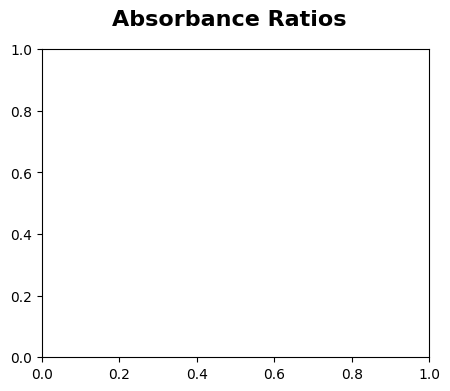

In [95]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
fig.suptitle("Absorbance Ratios", fontsize=16, fontweight='bold')

# df_absorbance_ratios = df_absorbance_ratios.mean(axis=0).to_frame().T

for i, row in df_absorbance_ratios.iterrows():
    H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
    H_percents = [float(s.strip('%HV')) for s in H_columns_str]

    V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
    V_percents = [float(s.strip('%HV')) for s in V_columns_str]

    unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
    unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]

    axs.plot(H_percents, row[H_columns_str], '.-',label=f"||-polarized")
    axs.plot(V_percents, row[V_columns_str], '.-', label=f"⊥-polarized")
    axs.plot(unpolaraized_percents, row[unpolarized_columns_str], '.-',label=f"Unpolarized")
    
axs.set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$')
axs.set_xlabel(r'$\epsilon$ (%)')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()

In [27]:
dfs=[]
for i, file_path in enumerate(file_paths):
    print(i, file_path)
    df = pd.read_csv(file_paths[0], skiprows=1, na_values=[' '])
    df.columns = ['Wavelength', 'Absorbance']
    df.dropna(subset=['Absorbance'], inplace=True)
    dfs.append(df)
dfs[0]

0 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/0%.txt
1 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/10% Tension H.txt
2 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/0% V.txt
3 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/20% Tension V.txt
4 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/0% H.txt
5 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/20% Tension H.txt
6 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/10% Tension.txt
7 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/20% Tension.txt
8 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM SC/0.15% P3HT/10% Tension V.txt
9 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT SC/Sample 1/30%.txt
10 /Users/adrian/Documents/UV-vis/Carlos_P3HT_11-1-24/P3HTPCBM MWCNT SC/Sample 1/0%.txt
11 /Users/a

,Wavelength,Absorbance
0,300.0,1.345108
2,301.0,1.331223
4,302.0,1.313690
6,303.0,1.299316
8,304.0,1.283600
...,...,...
1192,896.0,0.224274
1194,897.0,0.224289
1196,898.0,0.224304
1198,899.0,0.224274


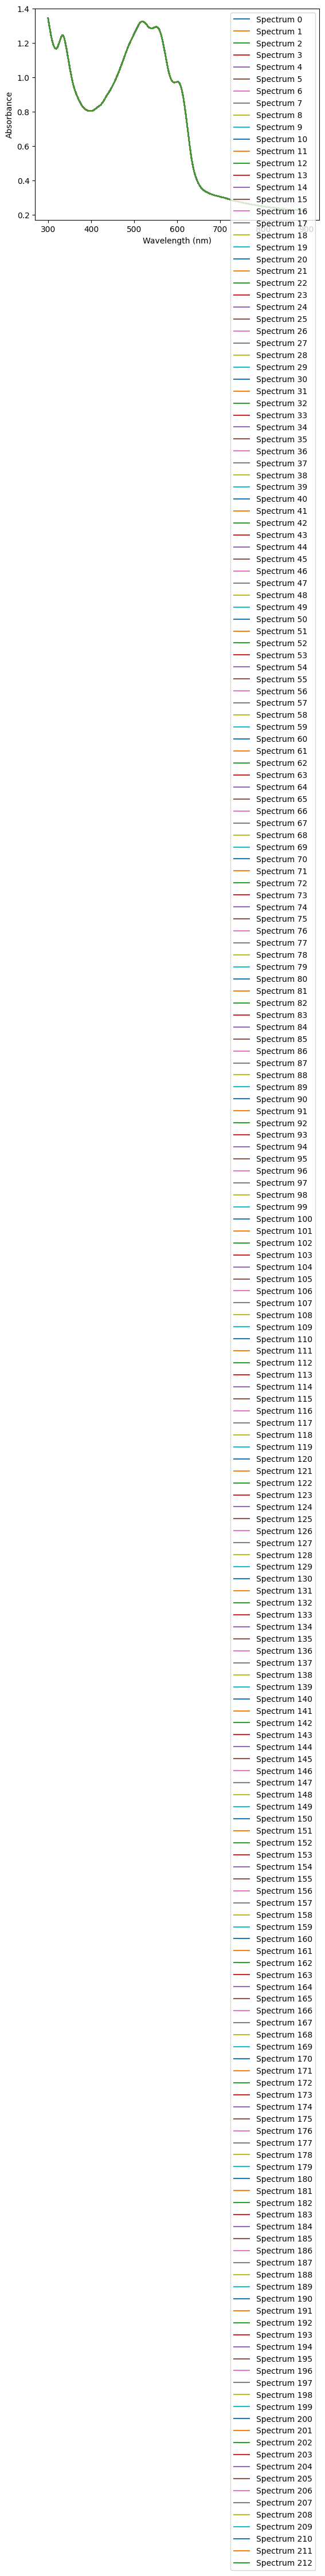

In [44]:
for i, df in enumerate(dfs):
    plt.plot(df['Wavelength'], df['Absorbance'], label=f'Spectrum {i}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
    plt.legend()
    